In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn.objects as so
from scipy import stats

In [57]:
# FighterA	F29	0,01117179	0,01108562
# FighterB	F29	0,01119493	0,0112161
# FighterC	F29	0,01124564	0,01120726
# FighterD	F29	0,01114201	0,01107389
# ScramblerA	F29	0,01149738	0,0115717
# ScramblerB	F29	0,01154638	0,01155847
# ScramblerC	F29	0,01149017	0,01154134
# ScramblerD	F29	0,01154638	0,01155847

#Extendet fig 4 = variance_sliding


#Utworzenie ramki danych

# data = [

#     ['ScramblerA', 0.01149738,	0.0115717, 'FN'],
#     ['ScramblerB', 0.01154638, 0.01155847, 'FN'],
#     ['ScramblerC', 0.01149017, 0.01154134, 'FN'],
#     ['ScramblerD', 0.01154638, 0.01155847, 'FN'],
#     ['FighterA', 0.01117179, 0.01108562, 'FW'],
#     ['FighterB', 0.01119493, 0.0112161, 'FW'],
#     ['FighterC', 0.01124564, 0.01120726, 'FW'],
#     ['FighterD', 0.01114201, 0.01107389, 'FW'],
# ]

data = [

	['FN1', 0.0133, 0.0124, 'FN'],
	['FN2', 0.0142, 0.0136, 'FN'],
	['FN3', 0.0129, 0.0123, 'FN'],
	['FN4', 0.0150, 0.0143, 'FN'],
	['FW1', 0.0111, 0.0105, 'FW'],
	['FW2', 0.0132, 0.0128, 'FW'],
	['FW3', 0.0123, 0.0116, 'FW'],
	['FW4', 0.0119, 0.0112, 'FW'],
    ['ScramblerA', 0.01149738,	0.0115717, 'FN_P'],
    ['ScramblerB', 0.01154638, 0.01155847, 'FN_P'],
    ['ScramblerC', 0.01149017, 0.01154134, 'FN_P'],
    ['ScramblerD', 0.01154638, 0.01155847, 'FN_P'],
    ['FighterA', 0.01117179, 0.01108562, 'FW_P'],
    ['FighterB', 0.01119493, 0.0112161, 'FW_P'],
    ['FighterC', 0.01124564, 0.01120726, 'FW_P'],
    ['FighterD', 0.01114201, 0.01107389, 'FW_P'],

]

columns = ['sample', 'pi', 'theta', 'type']

df1 = pd.DataFrame(data, columns=columns)
df1.set_index('sample', inplace=True)


In [58]:
df1

,pi,theta,type
sample,,,
FN1,0.013300,0.012400,FN
FN2,0.014200,0.013600,FN
FN3,0.012900,0.012300,FN
FN4,0.015000,0.014300,FN
FW1,0.011100,0.010500,FW
FW2,0.013200,0.012800,FW
FW3,0.012300,0.011600,FW
FW4,0.011900,0.011200,FW
ScramblerA,0.011497,0.011572,FN_P


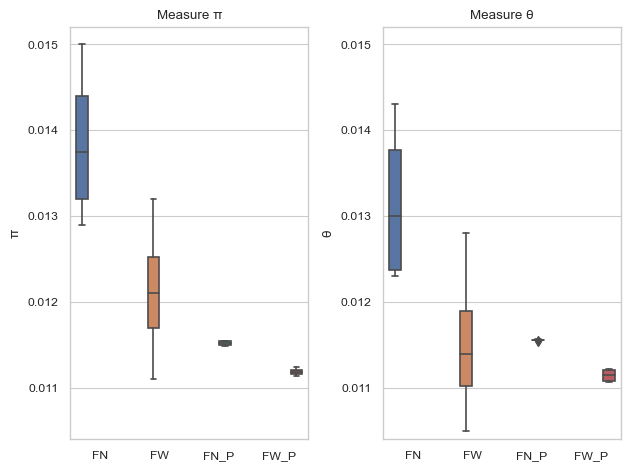

In [63]:
#Wizualizacja

sns.set_theme(style="whitegrid")
sns.set_context("paper")

fig, ax= plt.subplots(nrows=1, ncols=2)

sns.boxplot(data=df1, x="type", y="pi", hue="type", ax=ax[0])
ax[0].set_title("Measure π")
ax[0].set_xlabel("")
ax[0].set_ylabel("π")
ax[0].legend([],[], frameon=False)
ax[0].set(ylim=(0.0104, 0.0152))

sns.boxplot(data=df1, x="type", y="theta", hue="type", ax=ax[1])
ax[1].set_title("Measure θ")
ax[1].set_xlabel("")
ax[1].set_ylabel("θ")
ax[1].legend([],[], frameon=False)
ax[1].set(ylim=(0.0104, 0.0152))

fig.tight_layout()
plt.show()
fig.savefig(f'variance_sliding_pi_theta_parrett.png', dpi=500)

In [65]:
#Wizualzacja syn_nosyn



# data2 = [
#     ['ScramblerA' , 0.005496313, 0.0389163, 0.005601496, 0.03661994, 'FN'],
#     ['ScramblerB' , 0.00544643, 0.03847308, 0.005501621, 0.03601249, 'FN'],
#     ['ScramblerC' , 0.005493532, 0.03879939, 0.005604369, 0.03650458, 'FN'],
#     ['ScramblerD' , 0.005508931, 0.03885552, 0.005587705, 0.03634658, 'FN'],
#     ['FighterA' , 0.005318646, 0.03767723, 0.005342288, 0.03509818, 'FW'],
#     ['FighterB' , 0.005325028, 0.03777104, 0.005412584, 0.03555155, 'FW'],
#     ['FighterC' , 0.005356117, 0.03789093, 0.005421302, 0.03550088, 'FW'],
#     ['FighterD' , 0.005304197, 0.03744075, 0.00536741, 0.03515567, 'FW']
# ]

data2 = [

	['FN1', 0.0094, 0.0424, 0.0090, 0.0387, 'FN'],
	['FN2', 0.0098, 0.0442, 0.0096, 0.0413, 'FN'],
	['FN3', 0.0094, 0.0425, 0.0091, 0.0395, 'FN'],
	['FN4', 0.0103, 0.0460, 0.0100, 0.0424, 'FN'],
	['FW1', 0.0084, 0.0386, 0.0080, 0.0353, 'FW'],
	['FW2', 0.0092, 0.0423, 0.0091, 0.0400, 'FW'],
	['FW3', 0.0089, 0.0411, 0.0085, 0.0378, 'FW'],
	['FW4', 0.0085, 0.0402, 0.0082, 0.0373, 'FW'],
    ['ScramblerA' , 0.005496313, 0.0389163, 0.005601496, 0.03661994, 'FN_P'],
    ['ScramblerB' , 0.00544643, 0.03847308, 0.005501621, 0.03601249, 'FN_P'],
    ['ScramblerC' , 0.005493532, 0.03879939, 0.005604369, 0.03650458, 'FN_P'],
    ['ScramblerD' , 0.005508931, 0.03885552, 0.005587705, 0.03634658, 'FN_P'],
    ['FighterA' , 0.005318646, 0.03767723, 0.005342288, 0.03509818, 'FW_P'],
    ['FighterB' , 0.005325028, 0.03777104, 0.005412584, 0.03555155, 'FW_P'],
    ['FighterC' , 0.005356117, 0.03789093, 0.005421302, 0.03550088, 'FW_P'],
    ['FighterD' , 0.005304197, 0.03744075, 0.00536741, 0.03515567, 'FW_P']
]

columns = ['sample', 'pi_ns', 'pi_s', 'theta_ns', 'theta_s', 'type']

df2 = pd.DataFrame(data2, columns=columns)
df2.set_index('sample', inplace=True)

df2

,pi_ns,pi_s,theta_ns,theta_s,type
sample,,,,,
FN1,0.009400,0.042400,0.009000,0.038700,FN
FN2,0.009800,0.044200,0.009600,0.041300,FN
FN3,0.009400,0.042500,0.009100,0.039500,FN
FN4,0.010300,0.046000,0.010000,0.042400,FN
FW1,0.008400,0.038600,0.008000,0.035300,FW
FW2,0.009200,0.042300,0.009100,0.040000,FW
FW3,0.008900,0.041100,0.008500,0.037800,FW
FW4,0.008500,0.040200,0.008200,0.037300,FW
ScramblerA,0.005496,0.038916,0.005601,0.036620,FN_P


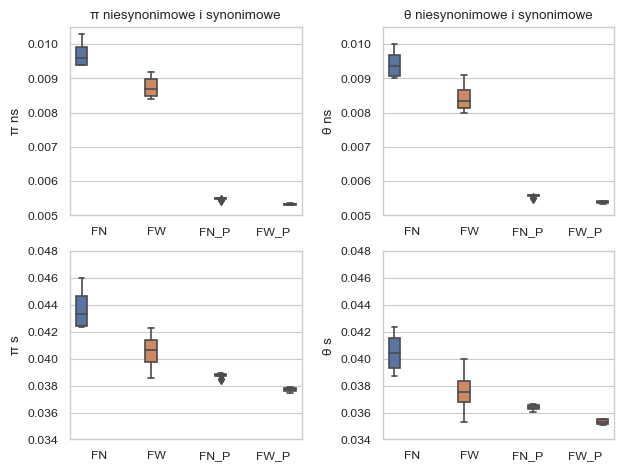

In [69]:
sns.set_theme(style="whitegrid")
sns.set_context("paper")

fig, ax= plt.subplots(nrows=2, ncols=2)

sns.boxplot(data=df2, x="type", y="pi_ns", hue="type", ax=ax[0, 0])
ax[0, 0].set_title("π niesynonimowe i synonimowe")
ax[0, 0].set_xlabel("")
ax[0, 0].set_ylabel("π ns")
ax[0, 0].legend([],[], frameon=False)
ax[0, 0].set(ylim=(0.005, 0.0105))
#ax[0, 0].set(ylim=(0.0075, 0.05))

sns.boxplot(data=df2, x="type", y="theta_ns", hue="type", ax=ax[0, 1])
ax[0, 1].set_title("θ niesynonimowe i synonimowe")
ax[0, 1].set_xlabel("")
ax[0, 1].set_ylabel("θ ns")
ax[0, 1].legend([],[], frameon=False)
ax[0, 1].set(ylim=(0.005, 0.0105))
#ax[0, 1].set(ylim=(0.0075, 0.05))

sns.boxplot(data=df2, x="type", y="pi_s", hue="type", ax=ax[1, 0])
ax[1, 0].set_xlabel("")
ax[1, 0].set_ylabel("π s")
ax[1, 0].legend([],[], frameon=False)
ax[1, 0].set(ylim=(0.034, 0.048))
#ax[1, 0].set(ylim=(0.0075, 0.05))

sns.boxplot(data=df2, x="type", y="theta_s", hue="type", ax=ax[1, 1])
ax[1, 1].set_xlabel("")
ax[1, 1].set_ylabel("θ s")
ax[1, 1].legend([],[], frameon=False)
ax[1, 1].set(ylim=(0.034, 0.048))
#ax[1, 1].set(ylim=(0.0075, 0.05))

fig.tight_layout()
plt.show()
fig.savefig(f'syn_nonsyn_sliding_pi_theta_parrett.png', dpi=500)